In [1]:
from pystencils.session import *

In [2]:
dh = ps.create_data_handling(domain_size=(256, 256), periodicity=True)
c_field = dh.add_array('c')
dh.fill("c", 0.0, ghost_layers=True)

In [3]:
for x in range(129):
    for y in range(258):
        dh.cpu_arrays['c'][x, y] = 1.0

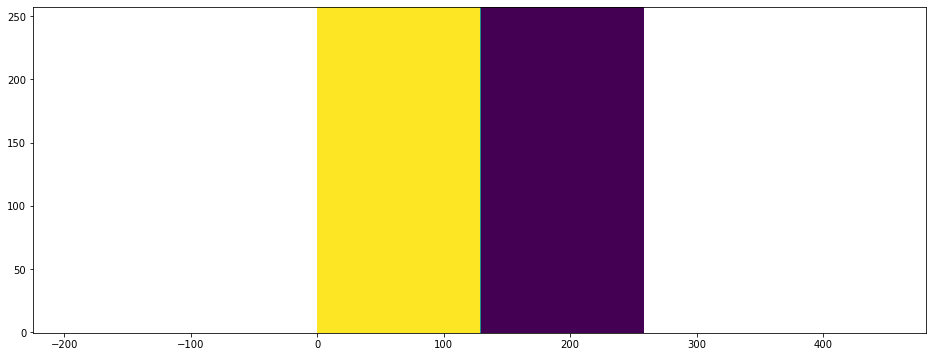

In [4]:
plt.scalar_field(dh.cpu_arrays["c"])

In [5]:
ur = ps.Assignment(c_field[0, 0], c_field[1, 0])
ast = ps.create_kernel(ur, target=dh.default_target, cpu_openmp=True)
kernel = ast.compile()

In [6]:
c_sync = dh.synchronization_function_cpu(['c'])

In [7]:
def timeloop(steps=10):
    for i in range(steps):
        c_sync()
        dh.run_kernel(kernel)
    return dh.gather_array('c')

In [8]:
ps.jupyter.set_display_mode('video')

In [9]:
ani = ps.plot.scalar_field_animation(timeloop, rescale=True, frames=12)
ps.jupyter.display_animation(ani)

In [10]:
ps.jupyter.set_display_mode('image_update')

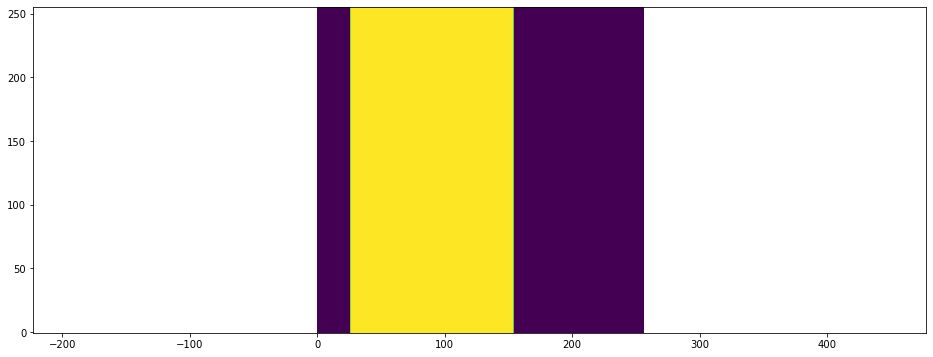

In [11]:
ani = ps.plot.scalar_field_animation(timeloop, rescale=True, frames=12)
ps.jupyter.display_animation(ani)

In [12]:
def grid_update_function(image):
    for i in range(40):
        c_sync()
        dh.run_kernel(kernel)
    return dh.gather_array('c')

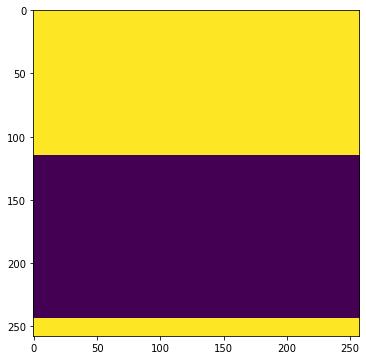

In [13]:
animation = ps.jupyter.make_imshow_animation(dh.cpu_arrays["c"], grid_update_function, frames=300)

In [14]:
ps.jupyter.set_display_mode("video")
ps.jupyter.set_display_mode("window")
ps.jupyter.set_display_mode("image_update")
ps.jupyter.activate_ipython()